In [2]:
import pandas as pd, numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# MPL Settings
import matplotlib as mpl,  matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

mpl.rcParams["font.family"] = "Arial"
mpl.rcParams['figure.dpi'] = 300
%matplotlib inline

grey = '#808080'
darkgrey = '#505050'
# (http://www.color-hex.com/color/505050)

mpl.rcParams['axes.linewidth'] = 0.3
mpl.rcParams['axes.edgecolor'] = grey
mpl.rcParams['xtick.color'] = grey
mpl.rcParams['ytick.color'] = grey
mpl.rcParams['text.color'] = darkgrey
mpl.rcParams['axes.labelcolor'] = darkgrey

In [4]:
wnba = pd.read_csv('src/wnba-player-stats-2017.zip')
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [5]:
# Grouped Frequency by customised bins
intervals = pd.interval_range(start = 0, end = 600, freq = 60)
# pd.Series(
wnba.groupby(pd.cut(wnba['PTS'], intervals), as_index=False).size().reset_index()
#     )

,PTS,0
0,"(0, 60]",30
1,"(60, 120]",25
2,"(120, 180]",17
3,"(180, 240]",22
4,"(240, 300]",15
5,"(300, 360]",7
6,"(360, 420]",11
7,"(420, 480]",7
8,"(480, 540]",4
9,"(540, 600]",5


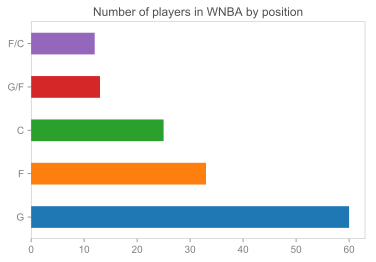

In [12]:
wnba['Pos'].value_counts().plot.barh(title = 'Number of players in WNBA by position')

wnba['Pos'].value_counts().iloc[[3,0,2,1,4]].plot.bar()

Text(0,0.5,'')

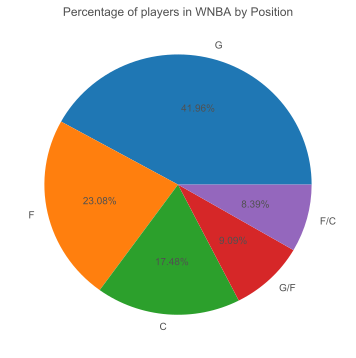

In [14]:
# Pie
wnba['Pos'].value_counts().plot.pie(figsize = (6,6), \
title = 'Percentage of players in WNBA by Position', autopct = '%.2f%%')

# csfont = {'fontname':'Arial'}
# hfont = {'fontname':'Arial'}

plt.ylabel('')
# plt.title('Percentage of players in WNBA by Position',**csfont)
# plt.xlabel('', **hfont)
plt.show()

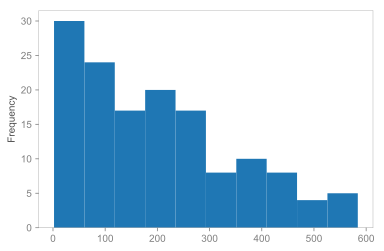

In [15]:
wnba['PTS'].plot.hist()

wnba['PTS'].describe()

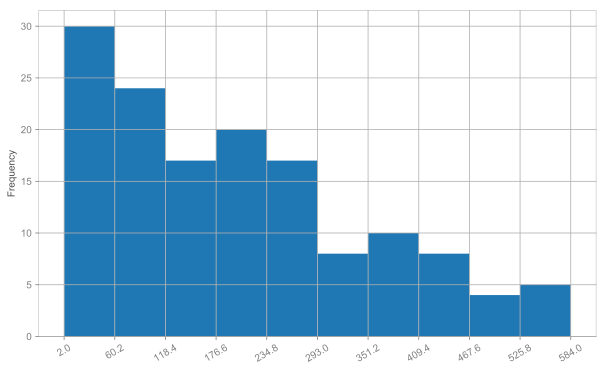

In [7]:
# Histogram with Grid
wnba['PTS'].plot.hist(grid = True, xticks = np.arange(2,585,58.2), rot = 30, figsize = (10,6))

In [18]:
wnba['Games Played'].describe()
wnba['Games Played'].value_counts(bins = 10).sort_index()

# Use min, max and bin width from value counts above (max + 1 for final x label)
wnba['Games Played'].plot.hist(grid = False, xticks = np.arange(2,33,3), rot = 0, figsize = (10,6))

count    143.000000
mean      24.356643
std        7.104259
min        2.000000
25%       22.000000
50%       27.000000
75%       29.000000
max       32.000000
Name: Games Played, dtype: float64

(1.969, 5.0]     5
(5.0, 8.0]       4
(8.0, 11.0]      3
(11.0, 14.0]     5
(14.0, 17.0]     6
(17.0, 20.0]     8
(20.0, 23.0]    15
(23.0, 26.0]    18
(26.0, 29.0]    48
(29.0, 32.0]    31
Name: Games Played, dtype: int64

Text(0.5,1,'The distribution of players by games played')

Text(0.5,0,'Games played')

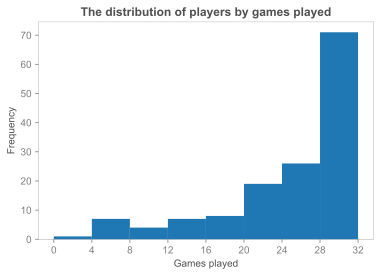

In [20]:
mpl.rc('axes',edgecolor='grey')
wnba['Games Played'].plot.hist(range = (0,32), bins = 8, xticks = range(0,33,4),)

plt.title("The distribution of players by games played",fontweight="bold")
plt.xlabel("Games played")
# plt.savefig('Games_Played.png')